In [76]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import h5py
import re

In [77]:
class IndexTracker:
    def __init__(self, ax, X, slice_axis=-2):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')
        self.slice_axis = slice_axis
        self.X = X
        self.slice_count = X.shape[self.slice_axis]
        self.ind = self.slice_count//2
        self.slice = [slice(None) for i in X.shape]
        self.slice[self.slice_axis] = self.ind

        self.im = ax.imshow(self.X[tuple(self.slice)])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slice_count
        else:
            self.ind = (self.ind - 1) % self.slice_count
        self.update()

    def update(self):
        self.slice[self.slice_axis] = self.ind
        data = self.X[tuple(self.slice)]
        self.im.set_data(data)
        self.im.set_clim(vmin=data.min(), vmax=data.max())
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [78]:
run_name = "results/TC_3d_re_1.000000e+03_eta_8.750000e-01_Gamma_3.000000e+00_M1_6_64_128_32"
ts = h5py.File(run_name+"/scalar/scalar_s1.h5", "r")
fn = run_name+"/snapshots/snapshots_s1.h5"
df = h5py.File(fn,"r")

In [79]:
eta = float(re.search("eta_([\d.e+-]+)",run_name).group(1))
print("eta = {:5.4f}".format(eta))

eta = 0.8750


In [80]:
R1 = eta/(1. - eta)
R2 = 1./(1-eta)
Omega1 = 1/R1
period = 2*np.pi/Omega1

In [81]:
t = ts['scales/sim_time'][:]
#rms_div_u = ts['tasks/rms_div_u'][:,0,0,0]
KE = ts['tasks/KE'][:,0,0,0]
KE_p = ts['tasks/perturbation_KE'][:,0,0,0]
u_rms = ts['tasks/u_rms'][:,0,0,0]
v_rms = ts['tasks/v_rms'][:,0,0,0]
w_rms = ts['tasks/w_rms'][:,0,0,0]
ts.close()

<IPython.core.display.Javascript object>


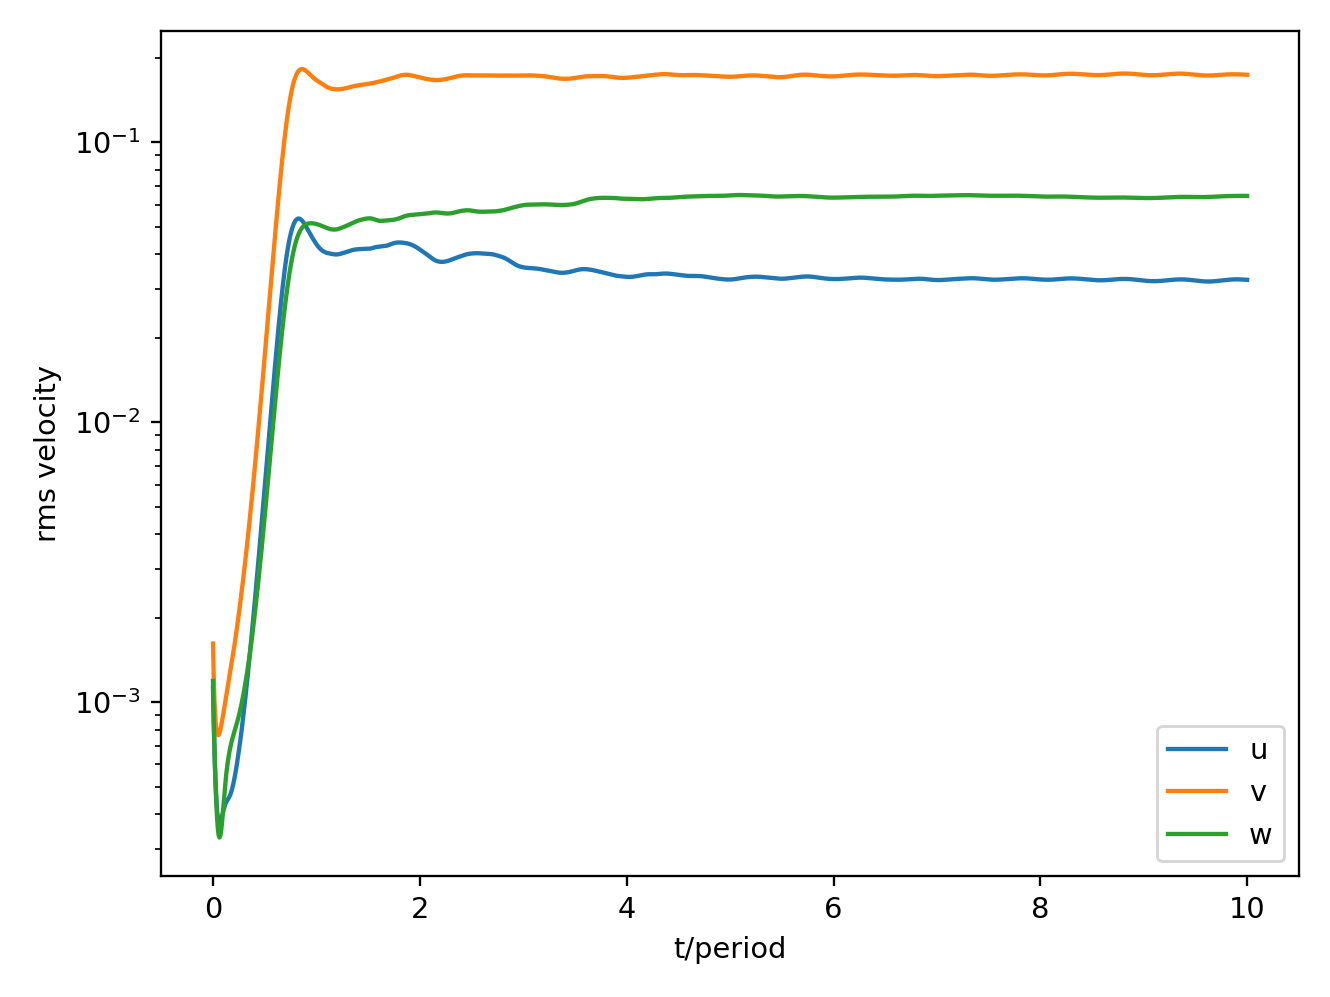

In [82]:
plt.figure()
plt.semilogy(t/period, u_rms, label='u')
plt.semilogy(t/period, v_rms, label='v')
plt.semilogy(t/period, w_rms, label='w')
plt.xlabel("t/period")
plt.ylabel("rms velocity")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


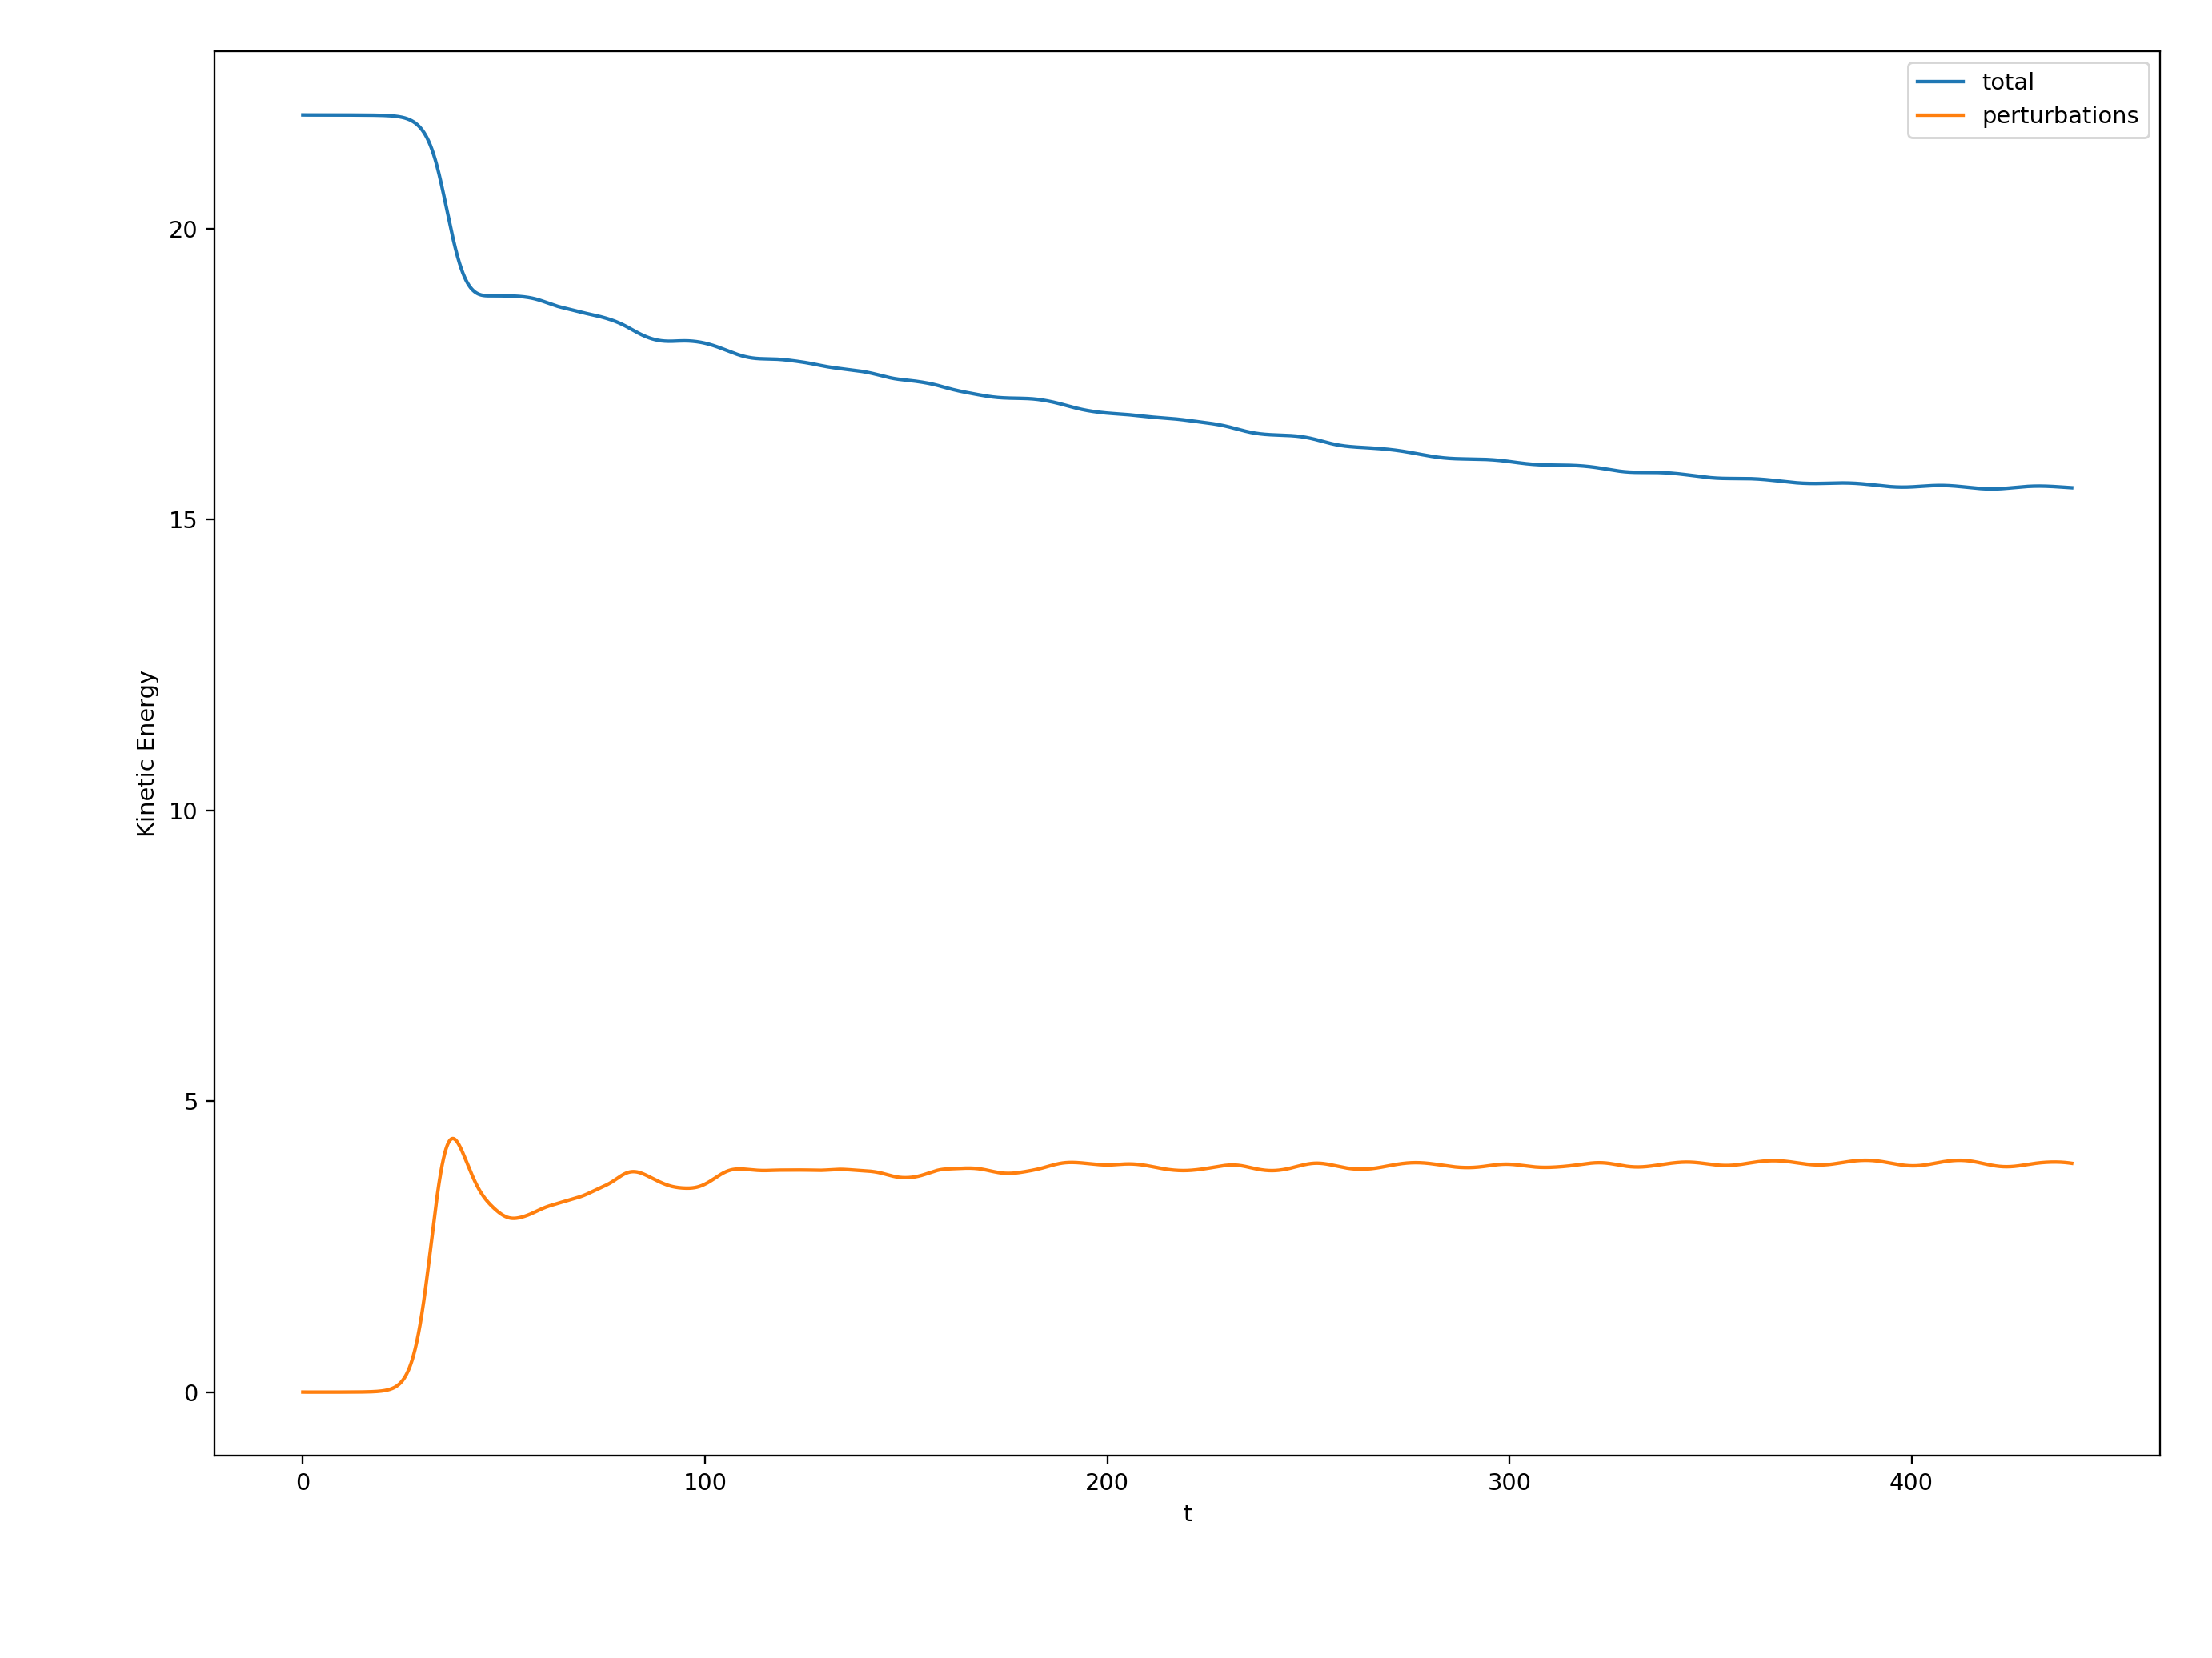

In [83]:
plt.figure()
plt.plot(t, KE, label='total')
plt.plot(t,KE_p, label="perturbations")
plt.xlabel("t")
plt.ylabel("Kinetic Energy")
plt.legend()
plt.tight_layout()

In [84]:
u = df['tasks/u'][:]
v = df['tasks/v'][:]
w = df['tasks/w'][:]

In [85]:
z = df['tasks/u'].dims[3][0][:]

In [86]:
upert = df['tasks/u'][:] - z

In [87]:
df['scales/sim_time'][:]

array([  0.        ,   4.52320313,   9.13640625,  13.57957807,
        17.62552722,  22.00933805,  26.40382443,  30.79999906,
        35.19311276,  39.58577625,  43.9855372 ,  48.38529814,
        52.78505908,  57.18482002,  61.58633452,  65.98148859,
        70.37664266,  74.77179673,  79.1793665 ,  83.57452057,
        87.96967464,  92.36482871,  96.77239848, 101.16755255,
       105.56270662, 109.95786069, 114.36543045, 118.76058453,
       123.1557386 , 127.55089267, 131.95846243, 136.35361651,
       140.74877058, 145.14392465, 149.55149441, 153.94664849,
       158.34180256, 162.73695663, 167.14452639, 171.53968046,
       175.93483454, 180.32998861, 184.73755837, 189.13271244,
       193.52786652, 197.92302059, 202.33059035, 206.72574442,
       211.1208985 , 215.51605257, 219.92362233, 224.32017902,
       228.71884062, 233.1063381 , 237.50499969, 241.90366129,
       246.30232288, 250.70098448, 255.09964607, 259.49830767,
       263.89696926, 268.29563086, 272.69517557, 277.09

<IPython.core.display.Javascript object>


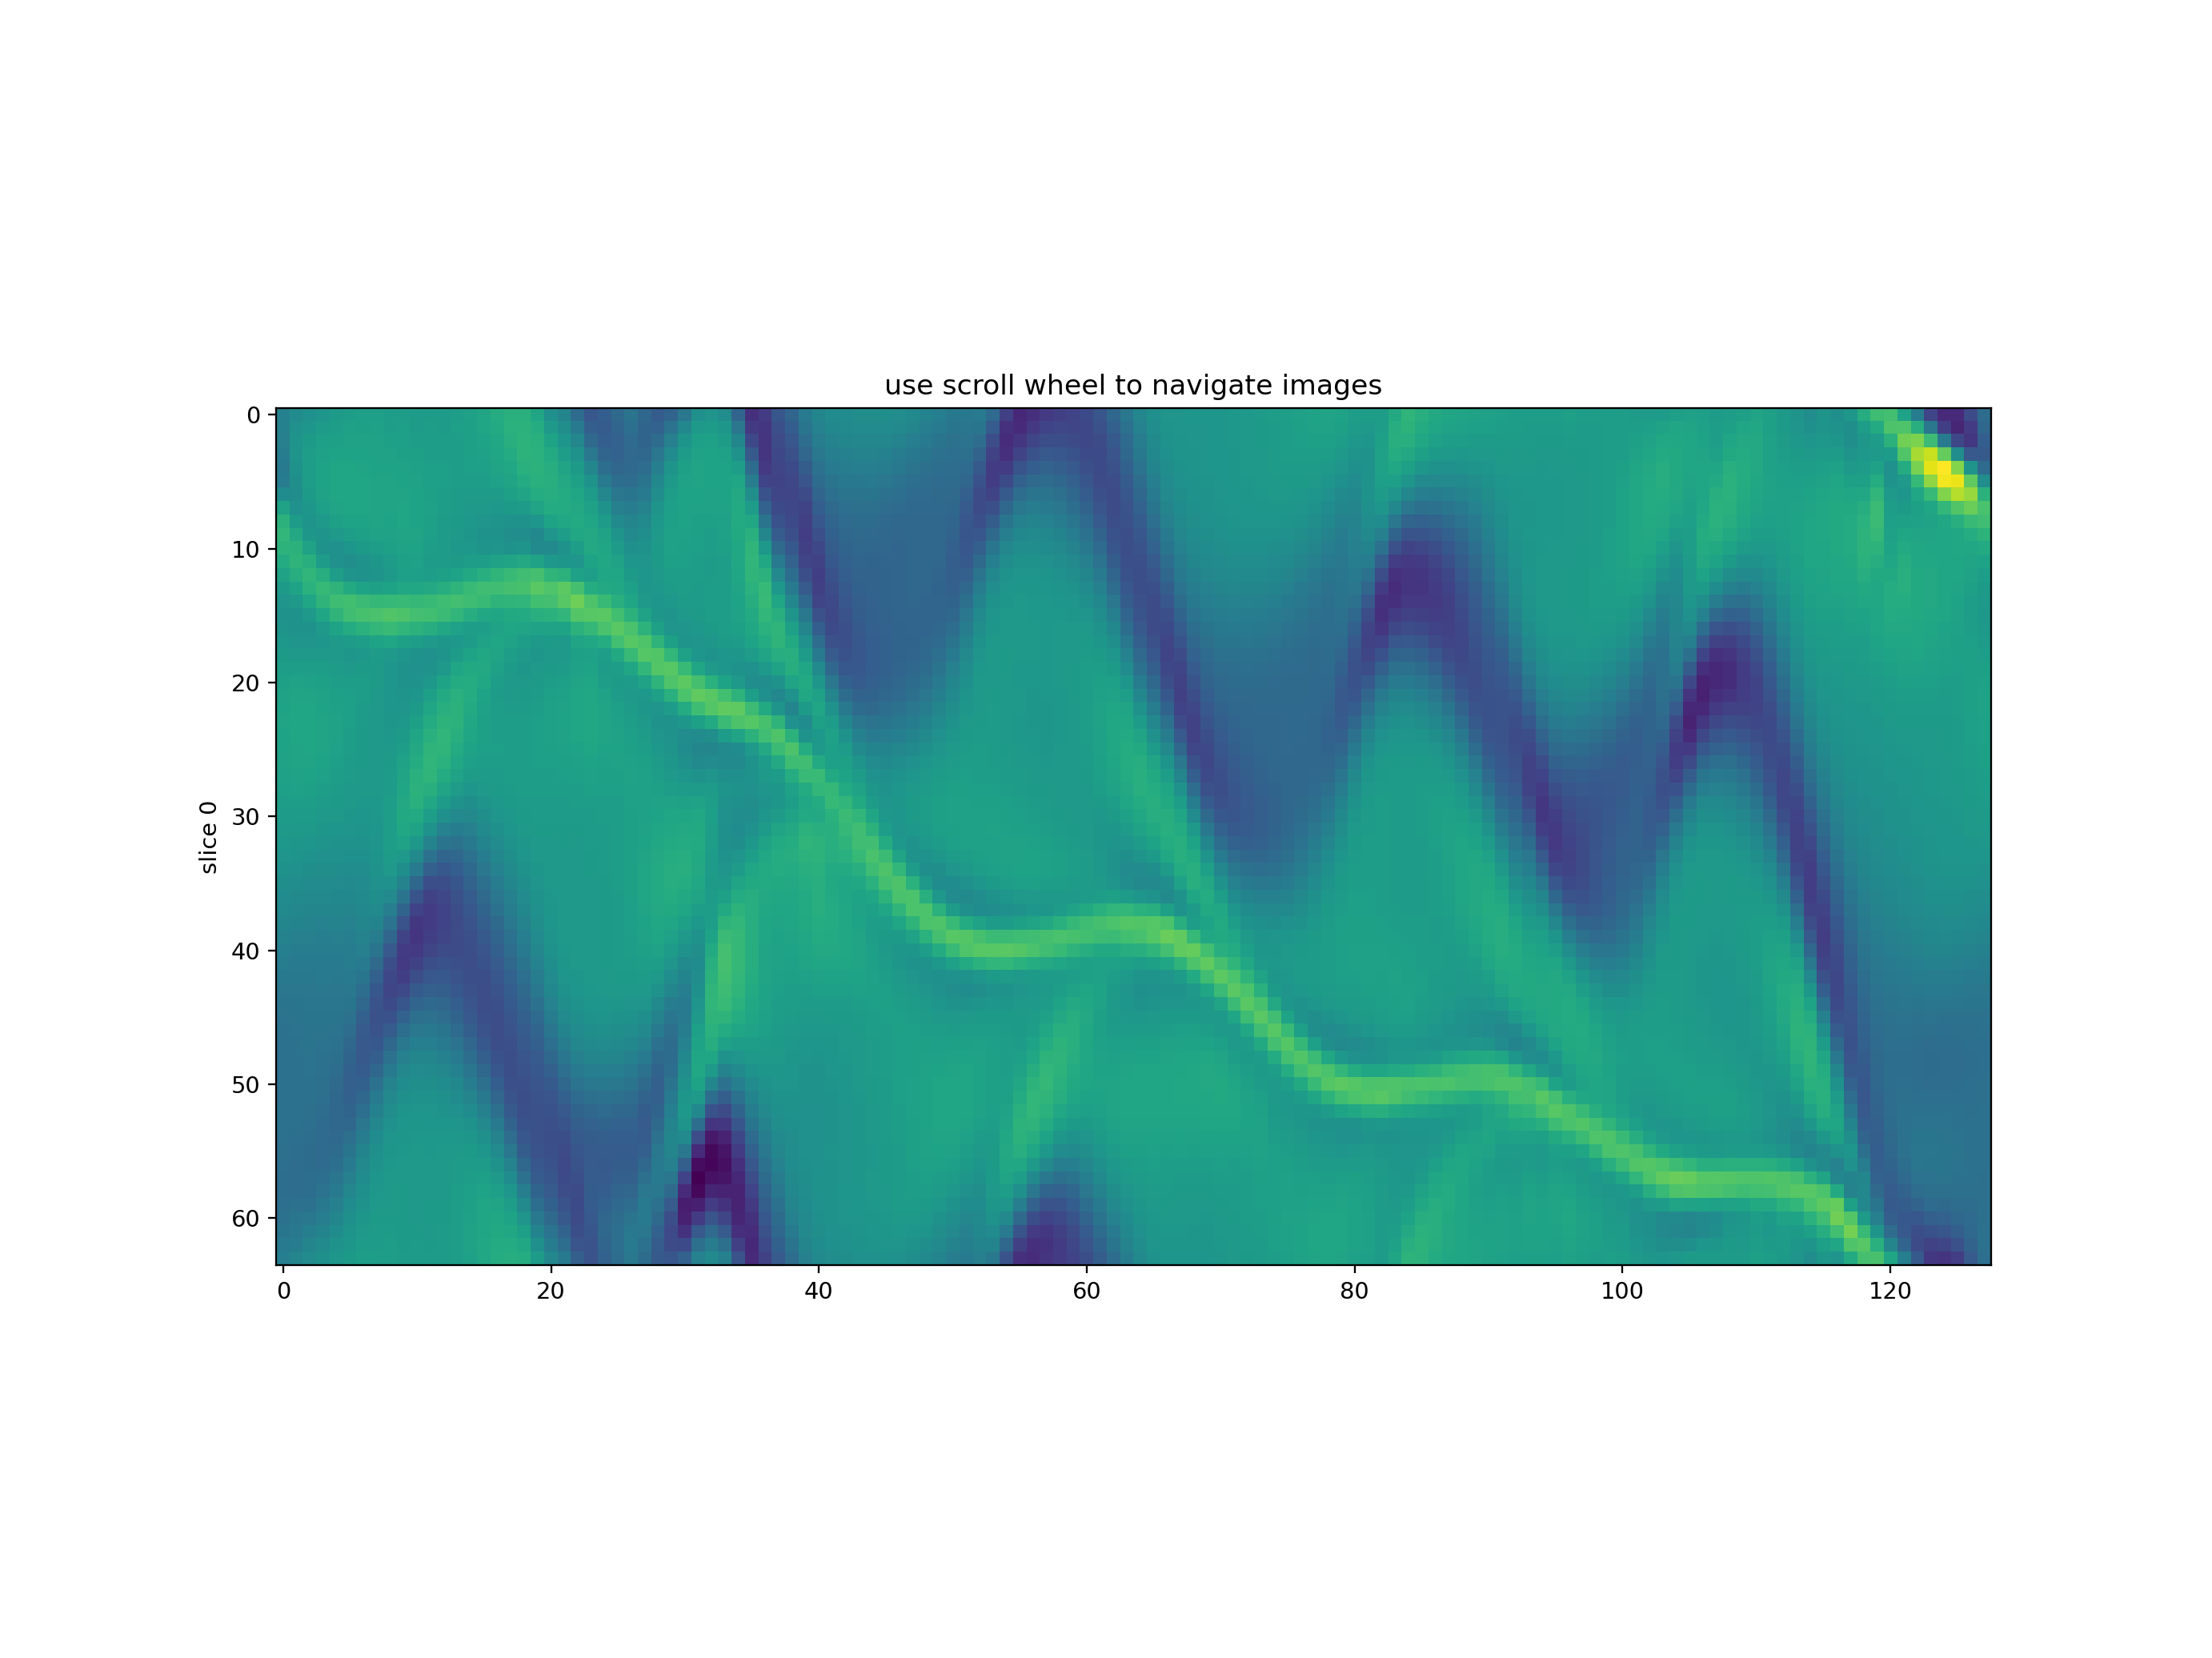

In [90]:
fig, ax = plt.subplots(1, 1)

tracker = IndexTracker(ax, u[-1],slice_axis=-1)
fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()

<IPython.core.display.Javascript object>


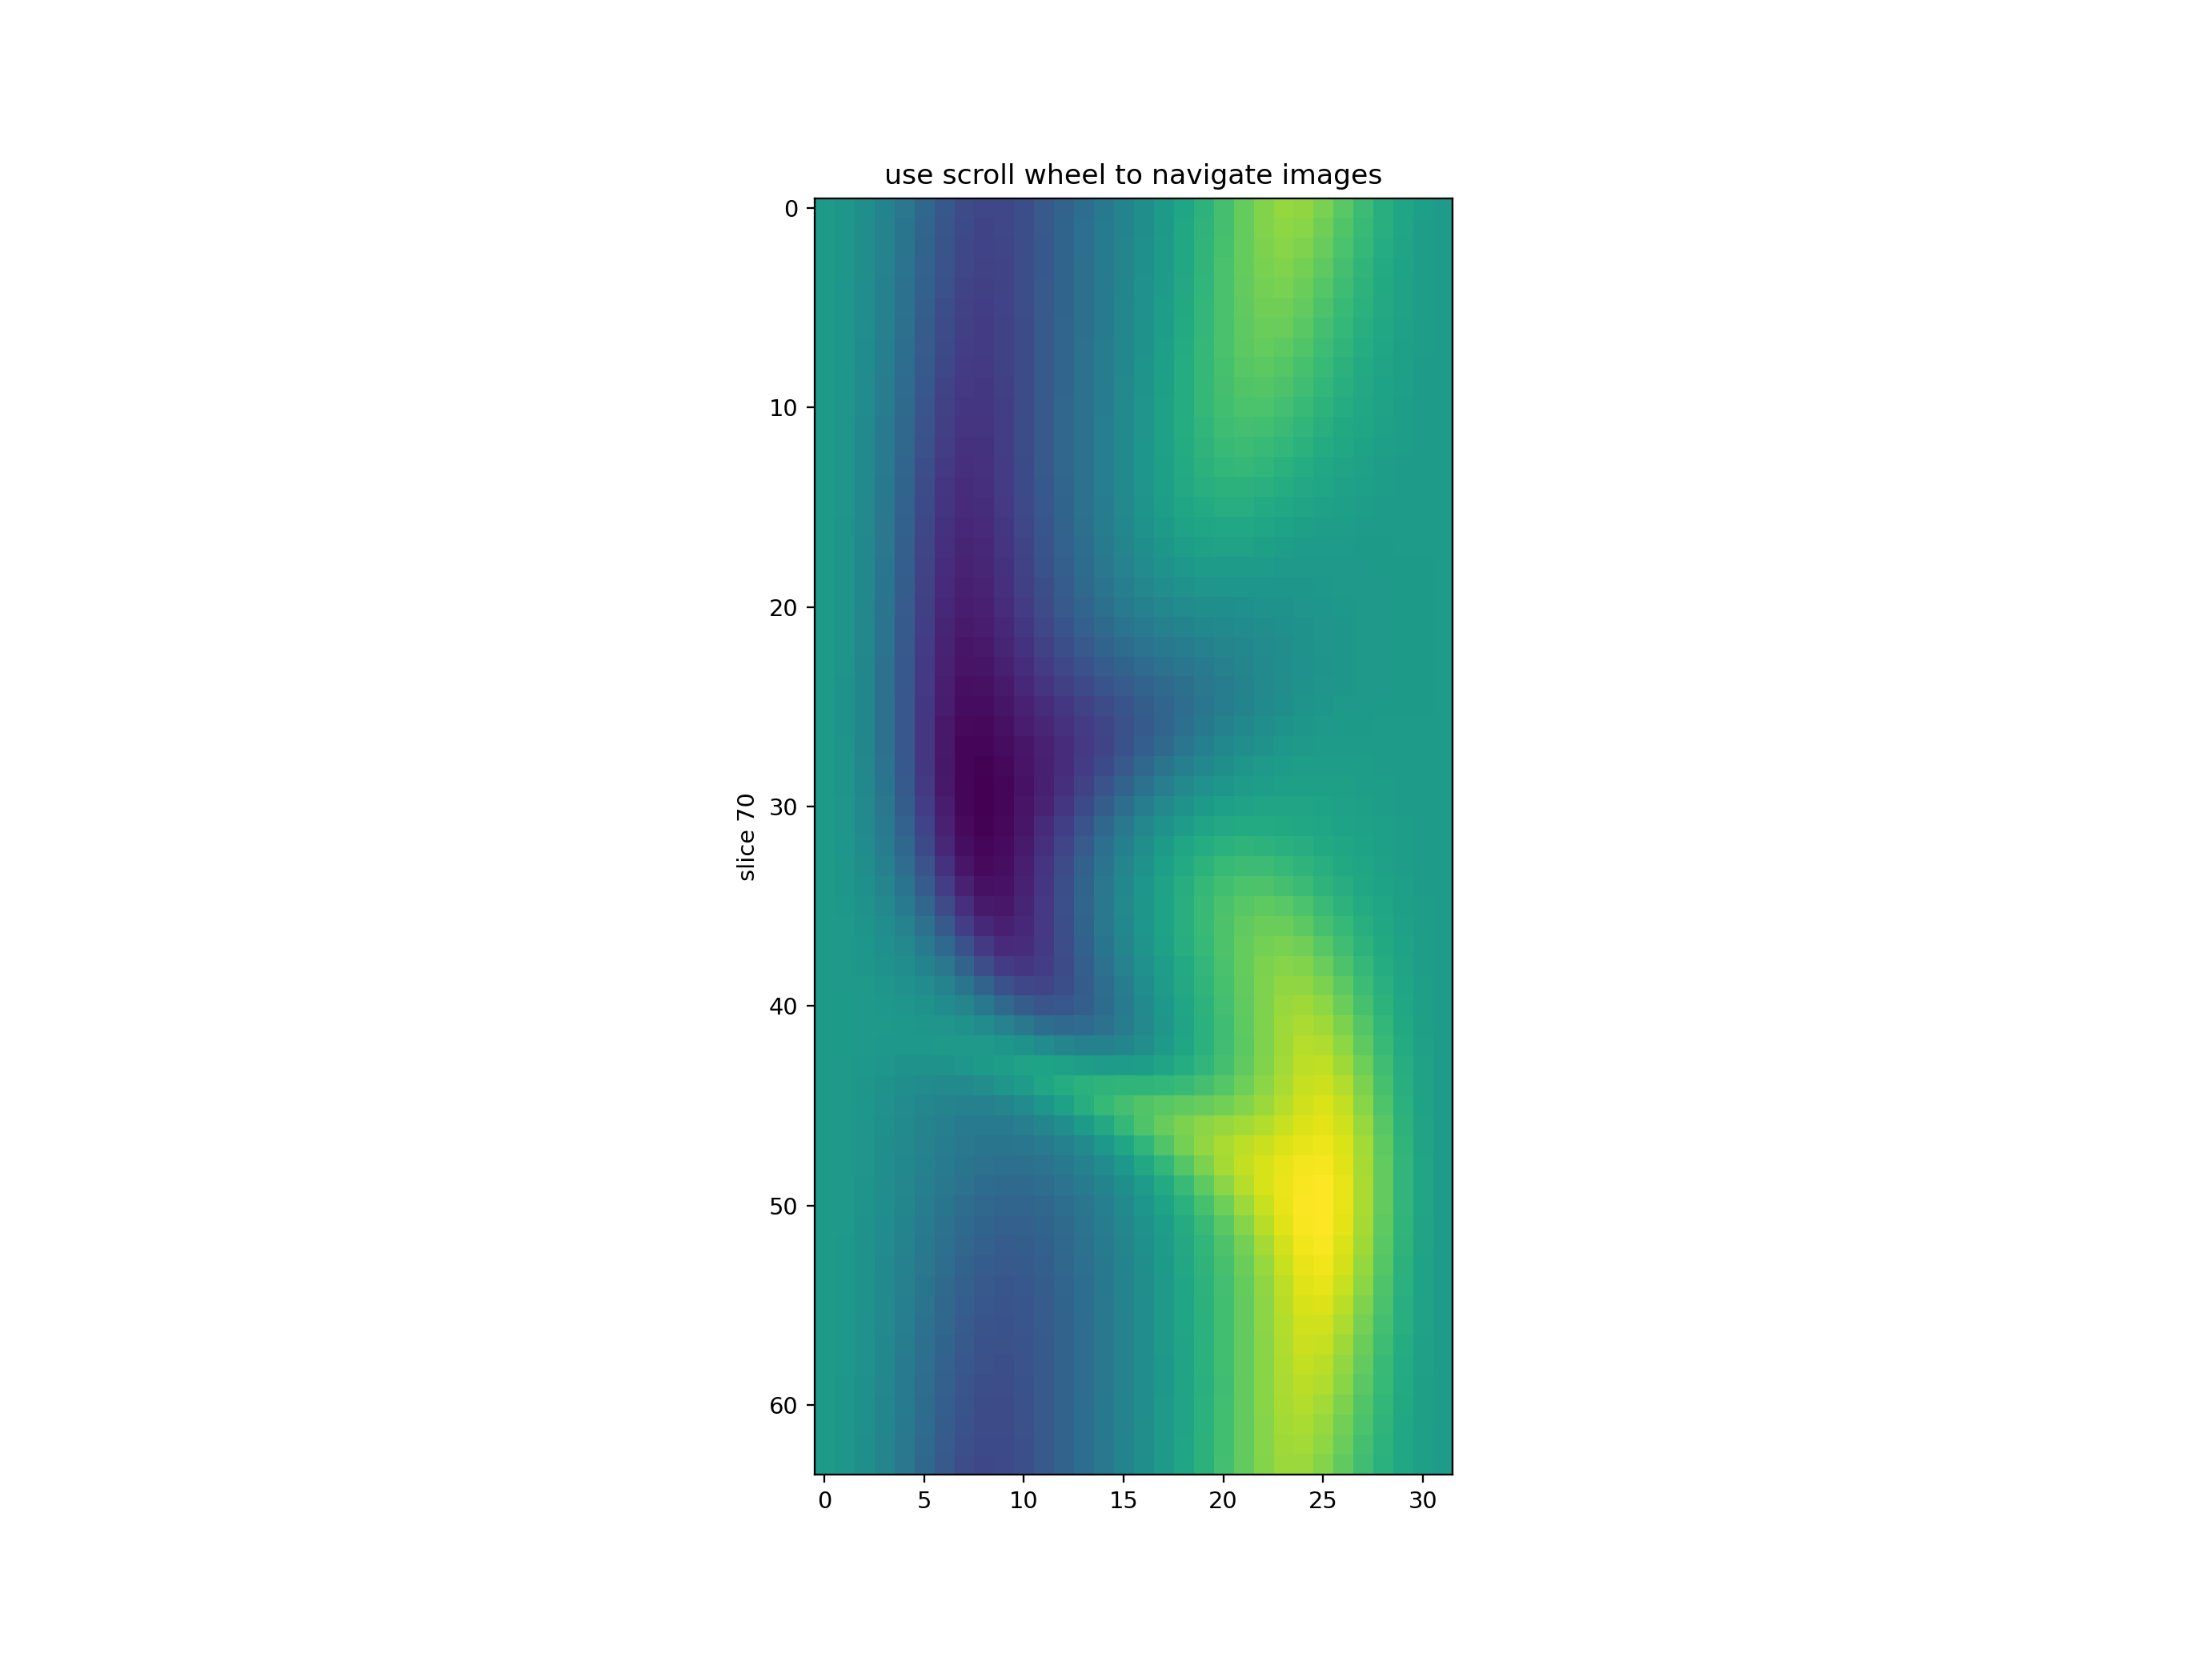

In [89]:
fig, ax = plt.subplots(1, 1)

tracker = IndexTracker(ax, v[-1],slice_axis=-2)
fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()